In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os


**Pair Programming Visualización I**

Es el momento de ponernos manos a la obra con la visualización de datos. En este primer ejercicio de pair programming trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas III, ese en el que habíamos eliminado algunas columnas de nuestro csv.
Hoy realizaremos una serie de gráficas usando la librería de matplotlib para familiarizarnos un poco con los datos.


📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.
Tendréis que realizar gráficas para contestar a las siguientes preguntas:

In [2]:
tabla_tiburones = pd.read_csv("../PANDAS/tiburones_eliminadas.csv")
tabla_tiburones.head()


,Unnamed: 0,UNNAMED: 0,CASE NUMBER,YEAR,TYPE,COUNTRY,AREA,LOCATION,ACTIVITY,NAME,SEX,AGE,TIME,SPECIES,PDF,HREF
0,0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,1,1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2,2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
3,3,3,2018.06.08,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
4,4,4,2018.06.04,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [3]:
tabla_tiburones.columns

Index(['Unnamed: 0', 'UNNAMED: 0', 'CASE NUMBER', 'YEAR', 'TYPE', 'COUNTRY',
       'AREA', 'LOCATION', 'ACTIVITY', 'NAME', 'SEX ', 'AGE', 'TIME',
       'SPECIES ', 'PDF', 'HREF'],
      dtype='object')

In [4]:
frec_sex = dict(tabla_tiburones["SEX "].value_counts())
frec_sex

{'M': 4939, 'F': 619, 'M ': 2, 'N': 2, 'lli': 1, '.': 1}

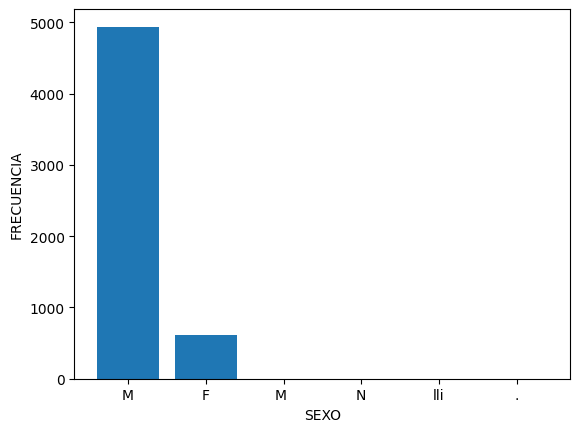

In [5]:
plt.figure()
plt.bar(frec_sex.keys(), frec_sex.values())
plt.xlabel("SEXO")
plt.ylabel("FRECUENCIA")
plt.show()

2. ¿Cuál es el porcentaje de nulos por columna?

Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct, aquí algo de documentación.

In [6]:
nulos_columnas = tabla_tiburones.isnull().sum()
nulos_columnas

Unnamed: 0        0
UNNAMED: 0        0
CASE NUMBER       1
YEAR              0
TYPE              4
COUNTRY          40
AREA            408
LOCATION        488
ACTIVITY        511
NAME            200
SEX             550
AGE            2666
TIME           3180
SPECIES        2705
PDF               0
HREF              0
dtype: int64

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

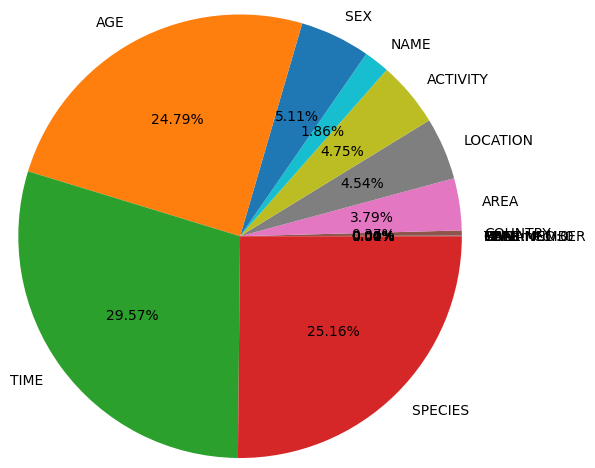

In [7]:
plt.figure()
plt.pie(nulos_columnas, labels = tabla_tiburones.columns, radius =1.5, autopct= "%1.2f%%")
plt.show()

4. Filtrad los datos para quedarnos solo con los datos de USA.

In [8]:
datos_usa = tabla_tiburones[tabla_tiburones["COUNTRY"] == "USA"]
datos_usa.head()

,Unnamed: 0,UNNAMED: 0,CASE NUMBER,YEAR,TYPE,COUNTRY,AREA,LOCATION,ACTIVITY,NAME,SEX,AGE,TIME,SPECIES,PDF,HREF
0,0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,1,1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2,2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
7,7,7,2018.05.27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,NaN,"Lemon shark, 3'",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
8,8,8,2018.05.26.b,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [9]:
areas_usa = pd.DataFrame(datos_usa["AREA"].value_counts())
areas_usa.head()

,AREA
Florida,1025
Hawaii,293
California,286
South Carolina,158
North Carolina,100


In [10]:
serie_estados= areas_usa.reset_index()
serie_estados.head()

,index,AREA
0,Florida,1025
1,Hawaii,293
2,California,286
3,South Carolina,158
4,North Carolina,100


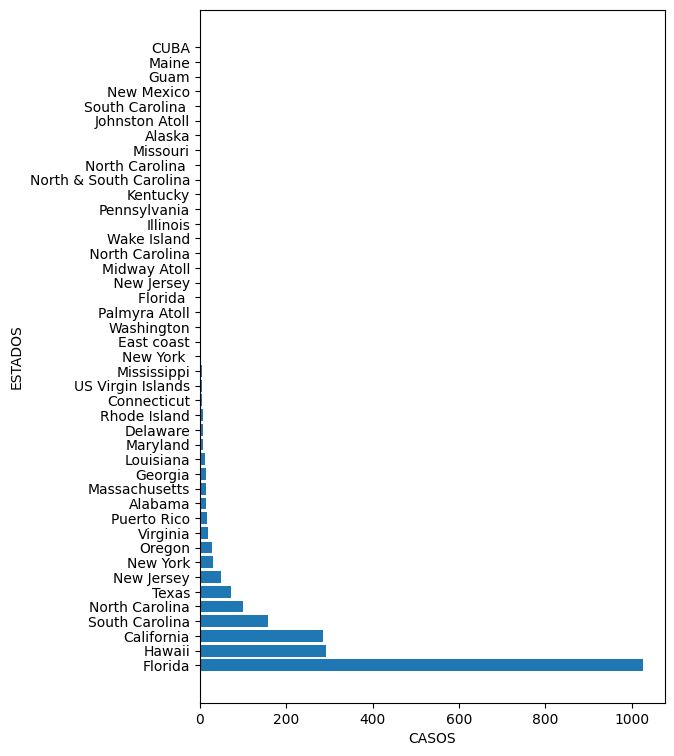

In [11]:
plt.figure(figsize=(6,9))
plt.barh(serie_estados["index"], serie_estados["AREA"])
plt.xlabel("CASOS")
plt.ylabel("ESTADOS")
plt.show()

¿Cuántos ataques de tiburones hubo en USA a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [12]:
ataques_usa_despues2000 = datos_usa[(datos_usa["YEAR"] >= (2000))]
ataques_usa_despues2000.head()

,Unnamed: 0,UNNAMED: 0,CASE NUMBER,YEAR,TYPE,COUNTRY,AREA,LOCATION,ACTIVITY,NAME,SEX,AGE,TIME,SPECIES,PDF,HREF
0,0,0,2018.06.25,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
1,1,1,2018.06.18,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2,2,2018.06.09,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
7,7,7,2018.05.27,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,NaN,"Lemon shark, 3'",2018.05.27-Ponce.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
8,8,8,2018.05.26.b,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",2018.05.26.b-High.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [13]:
#extraemos los ataques por estados
ataques_usa2000 = pd.DataFrame(ataques_usa_despues2000["AREA"].value_counts())
ataques_usa2000

,AREA
Florida,537
Hawaii,127
California,113
South Carolina,79
North Carolina,60
Texas,31
Oregon,14
Alabama,9
Massachusetts,6
New Jersey,5


In [14]:
#convertimos el DataFrame en serie para poder usar barh y que las barras salgan del ejey
serie_ataques= ataques_usa2000.reset_index()
serie_ataques.head()

,index,AREA
0,Florida,537
1,Hawaii,127
2,California,113
3,South Carolina,79
4,North Carolina,60


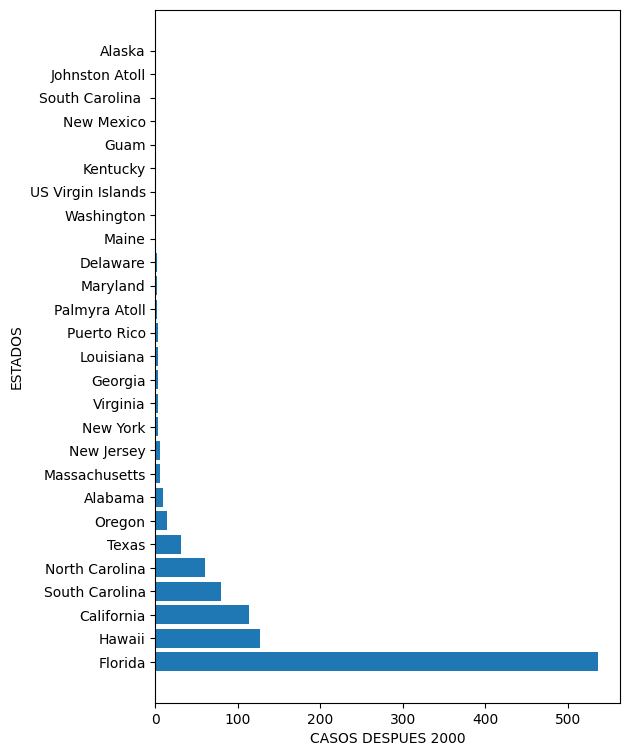

In [15]:
#hacemos la figura
plt.figure(figsize=(6,9))
plt.barh(serie_ataques["index"], serie_ataques["AREA"])
plt.xlabel("CASOS DESPUES 2000")
plt.ylabel("ESTADOS")
plt.show()

En función del tipo, ¿cuántos ataques de tiburones de cada tipo hubo en USA? Muestra los resultados en un gráfico de línea.

In [16]:
datos_usa["TYPE"].value_counts()
ataques_usa = pd.DataFrame(datos_usa["TYPE"].value_counts())
ataquesusa_dict = dict(ataques_usa.iloc[:,0])

ataquesusa_dict

{'Unprovoked': 1697,
 'Provoked': 205,
 'Invalid': 191,
 'Boating': 52,
 'Sea Disaster': 32,
 'Boat': 23}

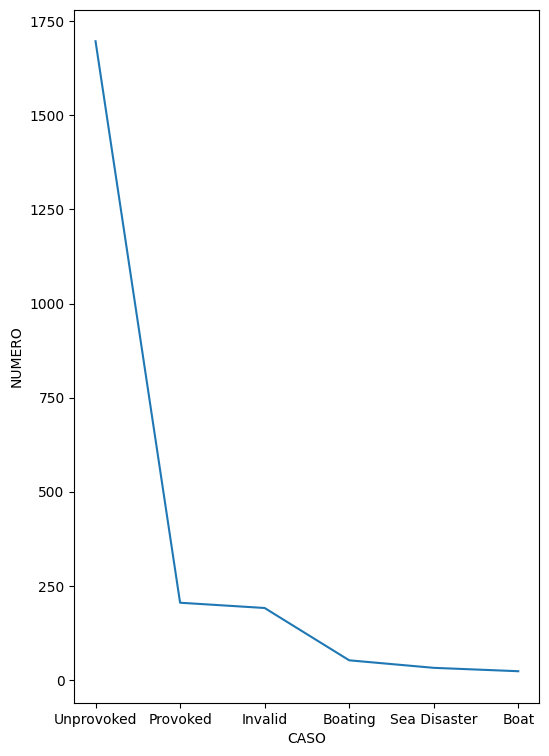

In [17]:
plt.figure(figsize=(6,9))
plt.plot(ataquesusa_dict.keys(), ataquesusa_dict.values())
plt.xlabel("CASO")
plt.ylabel("NUMERO")
plt.show()

5. Filtrad los datos para Spain:

In [18]:
datos_españa = tabla_tiburones[tabla_tiburones["COUNTRY"] == "SPAIN"]
datos_españa.head()

,Unnamed: 0,UNNAMED: 0,CASE NUMBER,YEAR,TYPE,COUNTRY,AREA,LOCATION,ACTIVITY,NAME,SEX,AGE,TIME,SPECIES,PDF,HREF
82,82,82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",2017.09.16.b-GrandCanary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
98,98,98,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
113,113,113,2017.07.23.a,2017.0,Unprovoked,SPAIN,Majorca,"Estanys Beach, Colonia de Sant",Swimming,female,F,NaN,Afternoon,Blue shark 6',2017.07.23.a-Majorca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
130,130,130,2017.06.17,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa den Bossa,Swimming,male,M,82,12h00,NaN,2017.06.17-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
233,233,234,2016.07.29,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,40,11h30,Blue shark,2016.07.29-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [19]:
areas_españa= pd.DataFrame(datos_españa["AREA"].value_counts())
areas_españa.head()

,AREA
Canary Islands,7
Catalonia,4
Alicante,3
Cádiz,3
Malaga,2


In [20]:
serie_areas= areas_españa.reset_index()
serie_areas.head()

,index,AREA
0,Canary Islands,7
1,Catalonia,4
2,Alicante,3
3,Cádiz,3
4,Malaga,2


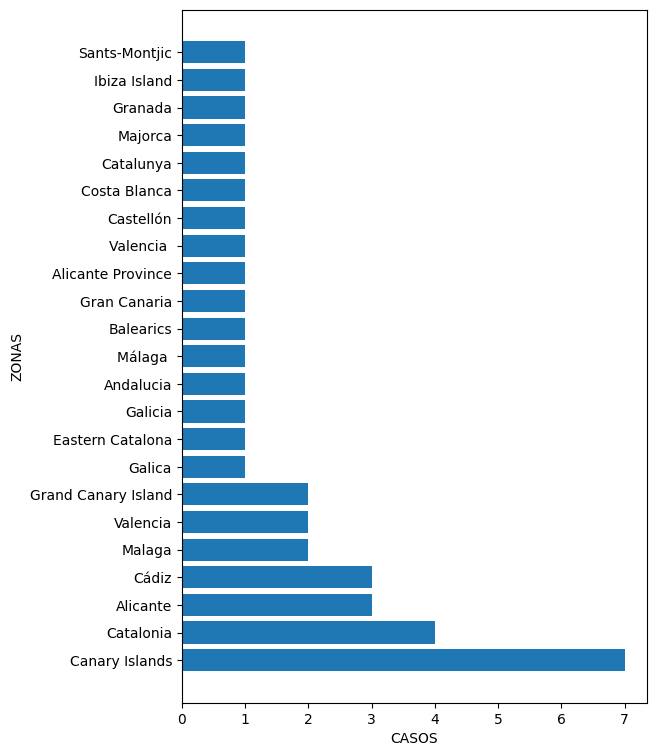

In [21]:
plt.figure(figsize=(6,9))
plt.barh(serie_areas["index"], serie_areas["AREA"])
plt.xlabel("CASOS")
plt.ylabel("ZONAS")
plt.show()

¿Cuántos ataques de tiburones hubo en España a lo largo del tiempo? Muestra solo los que hayan ocurrido del 2000 en adelante.

In [22]:
ataques_españa_despues2000 = datos_españa[(datos_españa["YEAR"] >= (2000))]
ataques_españa_despues2000.head()

,Unnamed: 0,UNNAMED: 0,CASE NUMBER,YEAR,TYPE,COUNTRY,AREA,LOCATION,ACTIVITY,NAME,SEX,AGE,TIME,SPECIES,PDF,HREF
82,82,82,2017.09.16.b,2017.0,Unprovoked,SPAIN,Canary Islands,Gran Canaria,Body surfing,male,M,13,NaN,"Porbeagle, 1.5 m",2017.09.16.b-GrandCanary.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
98,98,98,2017.08.26.b,2017.0,Invalid,SPAIN,Castellón,Grao de Moncofa,Swimming,female,F,11,Midday,Shark involvement questionable,2017.08.26.b-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
113,113,113,2017.07.23.a,2017.0,Unprovoked,SPAIN,Majorca,"Estanys Beach, Colonia de Sant",Swimming,female,F,NaN,Afternoon,Blue shark 6',2017.07.23.a-Majorca.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
130,130,130,2017.06.17,2017.0,Unprovoked,SPAIN,Ibiza Island,Playa den Bossa,Swimming,male,M,82,12h00,NaN,2017.06.17-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...
233,233,234,2016.07.29,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,40,11h30,Blue shark,2016.07.29-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...


In [23]:
#extraemos los ataques por zonas
ataques_españa2000 = pd.DataFrame(ataques_españa_despues2000["AREA"].value_counts())
ataques_españa2000

,AREA
Canary Islands,3
Alicante,3
Grand Canary Island,2
Catalonia,2
Castellón,1
Majorca,1
Ibiza Island,1
Alicante Province,1
Granada,1
Catalunya,1


In [24]:
#convertimos el DataFrame en serie para poder usar barh y que las barras salgan del ejey
serie_ataques_españa= ataques_españa2000.reset_index()
serie_ataques_españa.head()

,index,AREA
0,Canary Islands,3
1,Alicante,3
2,Grand Canary Island,2
3,Catalonia,2
4,Castellón,1


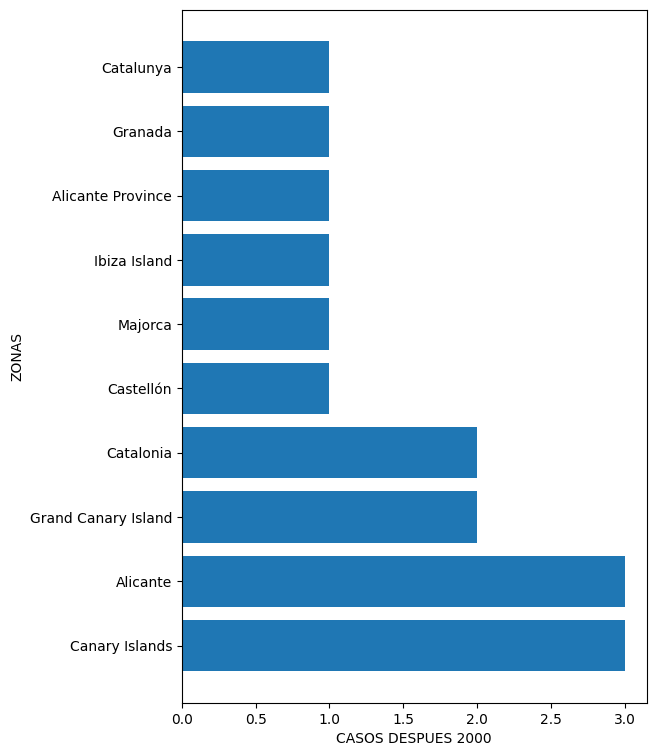

In [25]:
#hacemos la figura
plt.figure(figsize=(6,9))
plt.barh(serie_ataques_españa["index"], serie_ataques_españa["AREA"])
plt.xlabel("CASOS DESPUES 2000")
plt.ylabel("ZONAS")
plt.show()

En función del tipo, ¿cuántos ataques de cada tipo de tiburones hubo en España? Muestra los resultados en un gráfico de línea.

In [26]:
datos_españa["TYPE"].value_counts()
ataques_españa = pd.DataFrame(datos_españa["TYPE"].value_counts())
ataquesespaña_dict = dict(ataques_españa.iloc[:,0])

ataquesespaña_dict

{'Unprovoked': 26, 'Invalid': 10, 'Provoked': 5, 'Boating': 1}

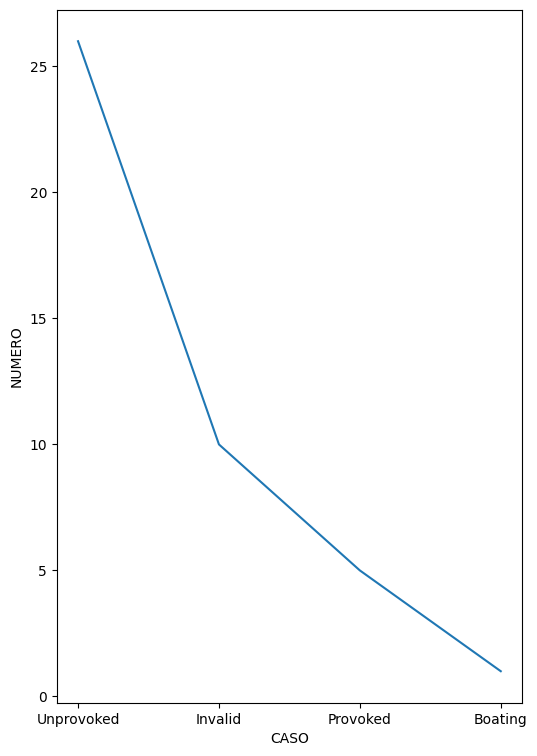

In [27]:
plt.figure(figsize=(6,9))
plt.plot(ataquesespaña_dict.keys(), ataquesespaña_dict.values())
plt.xlabel("CASO")
plt.ylabel("NUMERO")
plt.show()